In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2 as cv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D

In [2]:
train_df = pd.read_csv("A_Z Handwritten Data.csv").values

In [3]:
x_train = train_df[:,1:]
y_train = train_df[:,:1]

In [4]:
x_train.shape

(372450, 784)

In [5]:
x_train = np.resize(x_train,(372450,28,28))

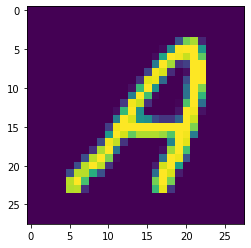

In [6]:
plt.imshow(x_train[13868])

In [7]:
y_train[90000]

array([9], dtype=int64)

In [8]:
x_train = np.resize(x_train,(372450,28,28,1))

In [9]:
x_train.shape

(372450, 28, 28, 1)

In [10]:
x_train = x_train / 255.

In [12]:
modl = Sequential()

modl.add(Conv2D(filters = 28, kernel_size = (3,3), input_shape = ((28, 28, 1))))
modl.add(MaxPooling2D(pool_size = (2,2)))

modl.add(Flatten())

modl.add(Dense(128, activation = 'relu'))
modl.add(Dropout(0.2))


modl.add(Dense(26, activation = 'softmax'))

modl.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [13]:
modl.fit(x = x_train,y = y_train, epochs = 10)

Epoch 1/10
11640/11640 [==============================] - 42s 2ms/step - loss: 0.2239 - accuracy: 0.9358
Epoch 2/10
11640/11640 [==============================] - 24s 2ms/step - loss: 0.1072 - accuracy: 0.9689
Epoch 3/10
11640/11640 [==============================] - 25s 2ms/step - loss: 0.0863 - accuracy: 0.9744
Epoch 4/10
11640/11640 [==============================] - 24s 2ms/step - loss: 0.0727 - accuracy: 0.9779
Epoch 5/10
11640/11640 [==============================] - 24s 2ms/step - loss: 0.0644 - accuracy: 0.9803
Epoch 6/10
11640/11640 [==============================] - 25s 2ms/step - loss: 0.0581 - accuracy: 0.9820
Epoch 7/10
11640/11640 [==============================] - 26s 2ms/step - loss: 0.0528 - accuracy: 0.9834
Epoch 8/10
11640/11640 [==============================] - 26s 2ms/step - loss: 0.0495 - accuracy: 0.9845
Epoch 9/10
11640/11640 [==============================] - 25s 2ms/step - loss: 0.0472 - accuracy: 0.9854
Epoch 10/10
11640/11640 [==============================

In [14]:
ch = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

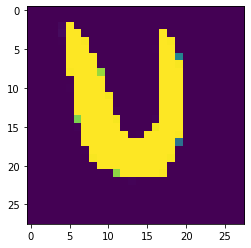

charcter is -  U


In [16]:
img = cv.imread("character/u.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.resize(gray,(28,28))
gray = gray/255.
gray = 1 - gray

plt.imshow(gray)
plt.show()

gray = np.resize(gray,(1,28,28,1))
print("charcter is - ",ch[np.argmax(modl.predict(gray))])

In [18]:
modl.predict(gray)

array([[0.0000000e+00, 5.4062091e-33, 5.9033444e-25, 1.4584752e-23,
        2.8610950e-38, 0.0000000e+00, 0.0000000e+00, 7.2275593e-15,
        0.0000000e+00, 1.1225945e-15, 0.0000000e+00, 0.0000000e+00,
        2.0105815e-25, 6.5061506e-10, 1.3644915e-18, 2.2483004e-27,
        0.0000000e+00, 0.0000000e+00, 2.6751971e-32, 6.0552796e-29,
        1.0000000e+00, 4.2622375e-16, 1.8483467e-16, 1.3499046e-37,
        1.8440772e-18, 0.0000000e+00]], dtype=float32)

In [21]:
modl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 609,458
Trainable params: 609,458
Non-trainable params: 0
________________________________________________